## 想解決的問題：

1. 貨幣市場金融工具和金融業拆款利率的相關性(央行訂定)
2. 資本市場金融工具和金融業拆款利率的相關性(央行訂定)
3. 在同一種債券下，到期日較長的利率是否比到期日較長短的利率高
4. 連結上次作業 => 債券利率和股票是否有關係

In [1]:
# 引入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# 設定 CSV 檔案(stock_index)的路徑
csv_file_path_cou = 'coupon in currency, capital market.csv'

# 使用 pandas 的 read_csv 函式讀取 CSV 檔案並將其轉換為 DataFrame 並使用 utf-8 的編碼方式來處理這個檔案
df_cou = pd.read_csv(csv_file_path_cou, encoding = 'utf-8')

df_cou

,統計期,金融業拆款,商業本票-初級市場-30天,商業本票-初級市場-31-90天,商業本票-初級市場-91-180天,商業本票-次級市場-1-30天,商業本票-次級市場-31-90天,商業本票-次級市場-91-180天,可轉讓定期存單-次級市場-1-90天,可轉讓定期存單-次級市場-9-180天,...,公司債-5年期,公司債-6年期,公司債-7年期,公司債-10年期,金融債券-2年期,金融債券-3年期,金融債券-5年期,央行單券-CDs1年期,央行單券-CDs2年期,央行單券-SB 1年期
0,86年,6.845,7.05,7.00,6.92,6.85,6.83,6.84,6.83,6.81,...,6.790,6.64,6.720,NaN,5.99,6.06,6.150,NaN,NaN,NaN
1,86年1月,5.653,6.06,6.17,5.74,5.57,5.90,5.70,5.73,5.68,...,6.550,NaN,NaN,NaN,NaN,5.70,NaN,NaN,NaN,NaN
2,86年2月,6.660,6.57,6.28,5.86,6.69,6.32,5.85,6.38,5.85,...,6.790,NaN,6.650,NaN,5.50,5.60,NaN,NaN,NaN,NaN
3,86年3月,6.188,6.36,6.38,6.46,6.14,6.18,6.29,6.15,6.19,...,6.990,6.65,6.830,NaN,NaN,5.80,NaN,NaN,NaN,NaN
4,86年4月,6.562,6.60,6.58,6.51,6.48,6.46,6.50,6.51,6.42,...,6.810,NaN,NaN,NaN,NaN,5.89,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,112年4月,0.681,1.41,1.48,1.45,1.19,1.26,1.38,1.14,1.38,...,1.583,NaN,1.644,1.902,NaN,NaN,1.409,1.233,1.218,NaN
342,112年5月,0.683,1.39,1.42,1.38,1.19,1.24,1.32,1.22,1.38,...,1.586,NaN,1.614,1.801,NaN,NaN,NaN,1.200,1.159,NaN
343,112年6月,0.686,1.49,1.55,1.53,1.23,1.34,1.50,1.27,1.43,...,1.587,1.64,1.618,1.809,NaN,NaN,1.400,1.217,1.133,NaN
344,112年7月,0.681,1.48,1.53,1.49,1.25,1.35,1.51,1.26,1.35,...,1.605,NaN,1.631,3.047,NaN,NaN,NaN,1.179,1.114,NaN


In [94]:
# 將資料中NaN的值替換為0
df_cou.fillna(0, inplace=True)

df_cou

,統計期,金融業拆款,商業本票-初級市場-30天,商業本票-初級市場-31-90天,商業本票-初級市場-91-180天,商業本票-次級市場-1-30天,商業本票-次級市場-31-90天,商業本票-次級市場-91-180天,可轉讓定期存單-次級市場-1-90天,可轉讓定期存單-次級市場-9-180天,...,公司債-5年期,公司債-6年期,公司債-7年期,公司債-10年期,金融債券-2年期,金融債券-3年期,金融債券-5年期,央行單券-CDs1年期,央行單券-CDs2年期,央行單券-SB 1年期
0,86年,6.845,7.05,7.00,6.92,6.85,6.83,6.84,6.83,6.81,...,6.790,6.64,6.720,0.000,5.99,6.06,6.150,0.000,0.000,0.0
1,86年1月,5.653,6.06,6.17,5.74,5.57,5.90,5.70,5.73,5.68,...,6.550,0.00,0.000,0.000,0.00,5.70,0.000,0.000,0.000,0.0
2,86年2月,6.660,6.57,6.28,5.86,6.69,6.32,5.85,6.38,5.85,...,6.790,0.00,6.650,0.000,5.50,5.60,0.000,0.000,0.000,0.0
3,86年3月,6.188,6.36,6.38,6.46,6.14,6.18,6.29,6.15,6.19,...,6.990,6.65,6.830,0.000,0.00,5.80,0.000,0.000,0.000,0.0
4,86年4月,6.562,6.60,6.58,6.51,6.48,6.46,6.50,6.51,6.42,...,6.810,0.00,0.000,0.000,0.00,5.89,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,112年4月,0.681,1.41,1.48,1.45,1.19,1.26,1.38,1.14,1.38,...,1.583,0.00,1.644,1.902,0.00,0.00,1.409,1.233,1.218,0.0
342,112年5月,0.683,1.39,1.42,1.38,1.19,1.24,1.32,1.22,1.38,...,1.586,0.00,1.614,1.801,0.00,0.00,0.000,1.200,1.159,0.0
343,112年6月,0.686,1.49,1.55,1.53,1.23,1.34,1.50,1.27,1.43,...,1.587,1.64,1.618,1.809,0.00,0.00,1.400,1.217,1.133,0.0
344,112年7月,0.681,1.48,1.53,1.49,1.25,1.35,1.51,1.26,1.35,...,1.605,0.00,1.631,3.047,0.00,0.00,0.000,1.179,1.114,0.0


In [95]:
# 儲存 日期 的數據
DATE = df_cou['統計期']

DATE

0         86年
1       86年1月
2       86年2月
3       86年3月
4       86年4月
        ...  
341    112年4月
342    112年5月
343    112年6月
344    112年7月
345    112年8月
Name: 統計期, Length: 346, dtype: object

### Q1：

In [96]:
# 儲存 金融業拆款(IBOR) 的數據
IBOR = df_cou['金融業拆款']

IBOR

0      6.845
1      5.653
2      6.660
3      6.188
4      6.562
       ...  
341    0.681
342    0.683
343    0.686
344    0.681
345    0.683
Name: 金融業拆款, Length: 346, dtype: float64

In [97]:
# 儲存 商業本票(CP)，可轉讓定期存單(NCD)，國庫券(T-bill)，公債附條件交易利率(RS) 的數據
CP = df_cou['商業本票-次級市場-31-90天']
NCD = df_cou['可轉讓定期存單-次級市場-1-90天']
Tbill = df_cou['國庫券-初級市場-1-91天']
RS = df_cou['公債附條件交易利率-次級市場-31-90天']


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


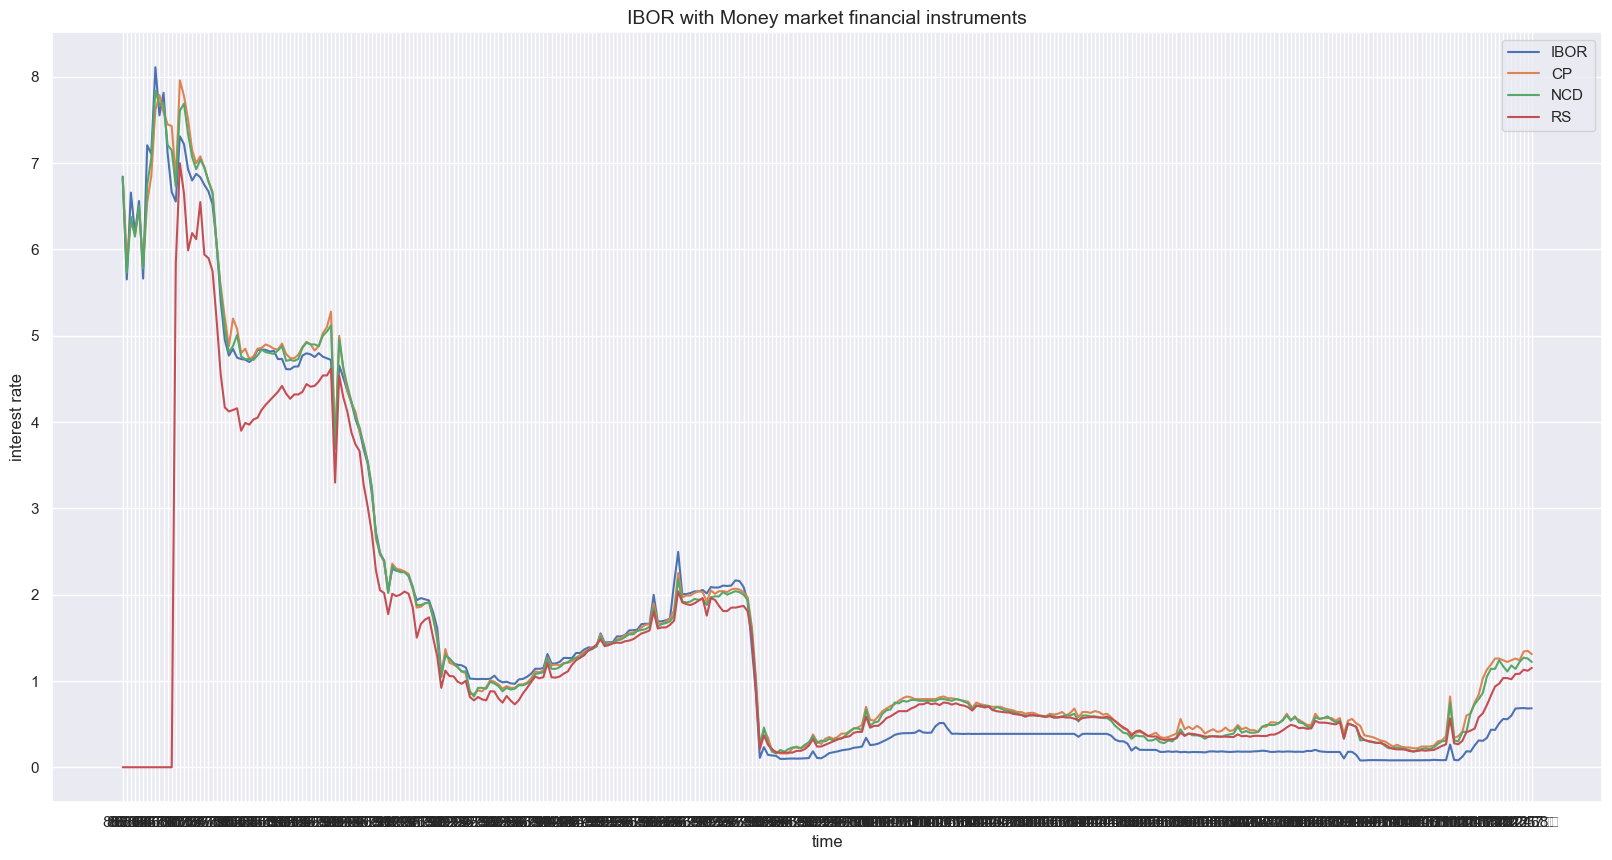

In [170]:
# 圖表設定 - 金融業拆款和貨幣市場金融工具的利率比較圖

# 建立一個資料框
df_sou = pd.DataFrame(data)

# 設定Seaborn主題
sns.set_theme()

# 使用sns.lineplot來繪製多條線的折線圖，並設定圖片大小
sns.lineplot(data=df_sou, x=DATE, y=IBOR, label="IBOR")
sns.lineplot(data=df_sou, x=DATE, y=CP, label="CP")
sns.lineplot(data=df_sou, x=DATE, y=NCD, label="NCD")
# sns.lineplot(data=df_sou, x=DATE, y=Tbill, label="Tbill")
sns.lineplot(data=df_sou, x=DATE, y=RS, label="RS")
sns.set_context({'figure.figsize':[20, 20]})

# 添加圖示
plt.legend()

# 設定標題和座標軸標題
plt.title("IBOR with Money market financial instruments", fontsize = 14)
plt.xlabel("time")
plt.ylabel("interest rate")

# 顯示圖形
plt.show()

C:\Users\sophie\AppData\Local\Temp\ipykernel_4440\3867748999.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


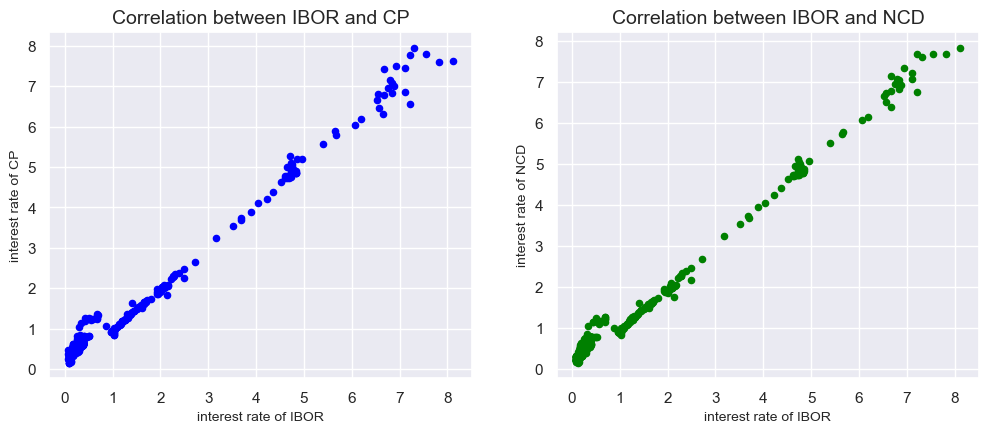

In [145]:
# 圖表設定1 - 金融業拆款和商業本票(貨幣市場)的關係
# 圖表設定2 - 金融業拆款和可轉讓定期存單(貨幣市場)的關係

# 建立繪圖物件 fig, 大小為 12 * 4.5, 內有 1 列 2 欄的小圖, 兩圖共用 x 軸, 但不共用y軸
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = False, figsize = (12, 4.5))

# 設定小圖 ax2 的坐標軸標籤, 以及使用 plot 繪圖
ax1.set_title('Correlation between IBOR and CP', fontsize = 14)
ax1.set_xlabel('interest rate of IBOR', fontsize = 10)
ax1.set_ylabel('interest rate of CP', fontsize = 10)
ax1.scatter(IBOR, CP, color = 'blue', s = 20)

# 設定小圖 ax2 的坐標軸標籤, 以及使用 plot 繪圖
ax2.set_title('Correlation between IBOR and NCD', fontsize = 14)
ax2.set_xlabel('interest rate of IBOR', fontsize = 10)
ax2.set_ylabel('interest rate of NCD', fontsize = 10)
ax2.scatter(IBOR, NCD, color = 'green', s = 20)


fig.show()

### Q2：

In [100]:
# 儲存 政府公債(CGBs)，公司債(CB)，金融債券(FB) 的數據
CGBs = df_cou['政府公債-5年期']
CB = df_cou['公司債-5年期']
FB = df_cou['金融債券-2年期']


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


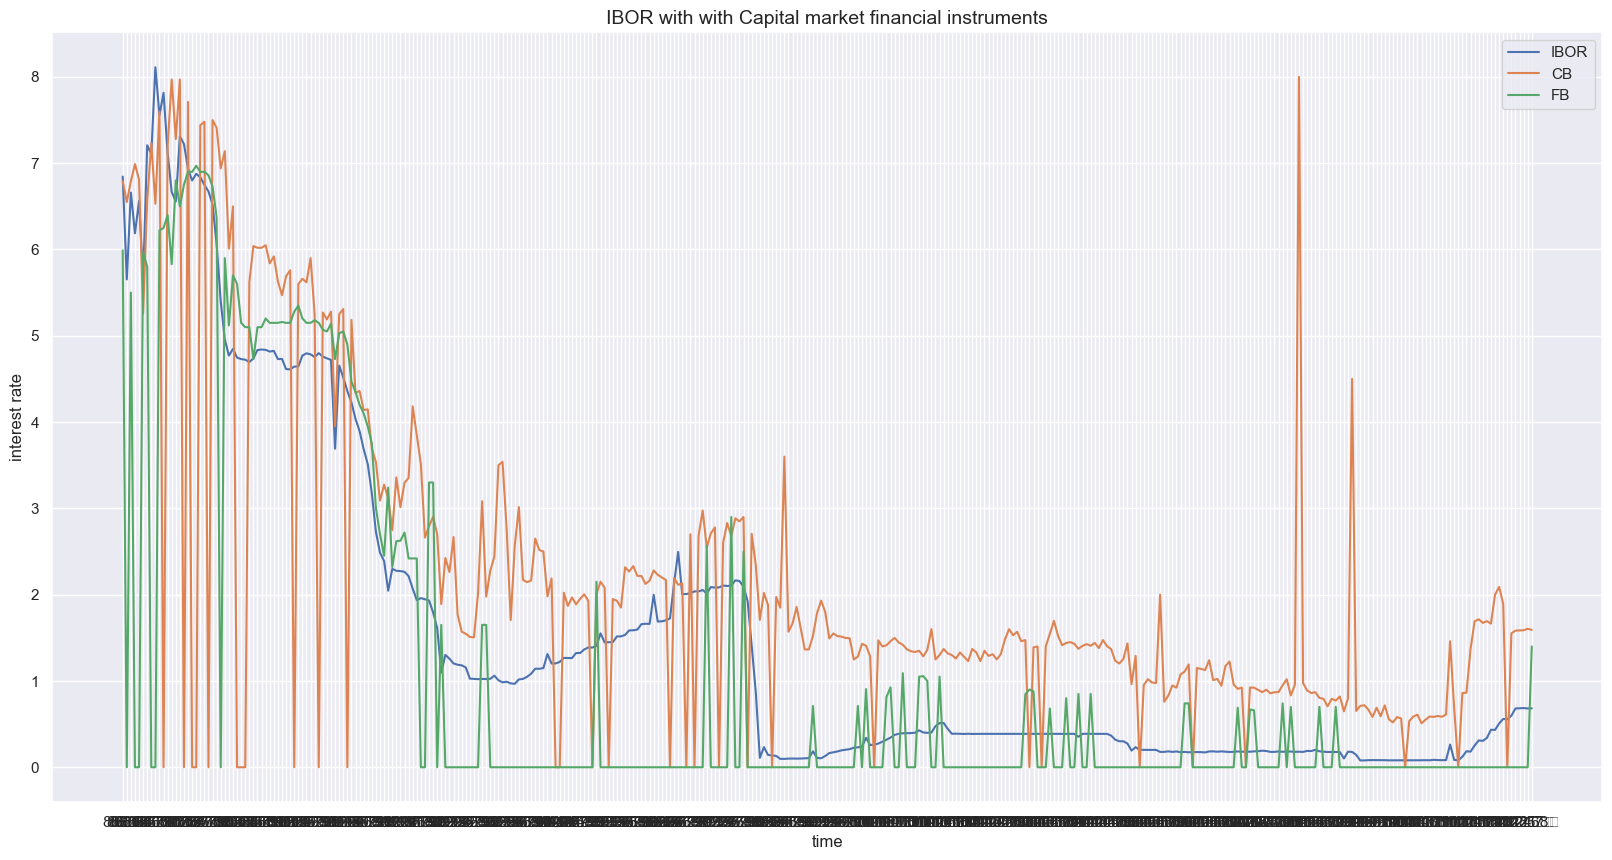

In [173]:
# 圖表設定 - 金融業拆款和資本市場金融工具的利率比較圖

# 建立一個資料框
df_sou = pd.DataFrame(data)

# 設定Seaborn主題
sns.set_theme()

# 使用sns.lineplot來繪製多條線的折線圖，並設定圖片大小
sns.lineplot(data=df_sou, x=DATE, y=IBOR, label="IBOR")
# sns.lineplot(data=df_sou, x=DATE, y=CGBs, label="CGBs")
sns.lineplot(data=df_sou, x=DATE, y=CB, label="CB")
sns.lineplot(data=df_sou, x=DATE, y=FB, label="FB")
sns.set_context({'figure.figsize':[20, 20]})

# 添加圖示
plt.legend()

# 設定標題和座標軸標題
plt.title("IBOR with with Capital market financial instruments", fontsize = 14)
plt.xlabel("time")
plt.ylabel("interest rate")

# 顯示圖形
plt.show()

C:\Users\sophie\AppData\Local\Temp\ipykernel_4440\2054325470.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


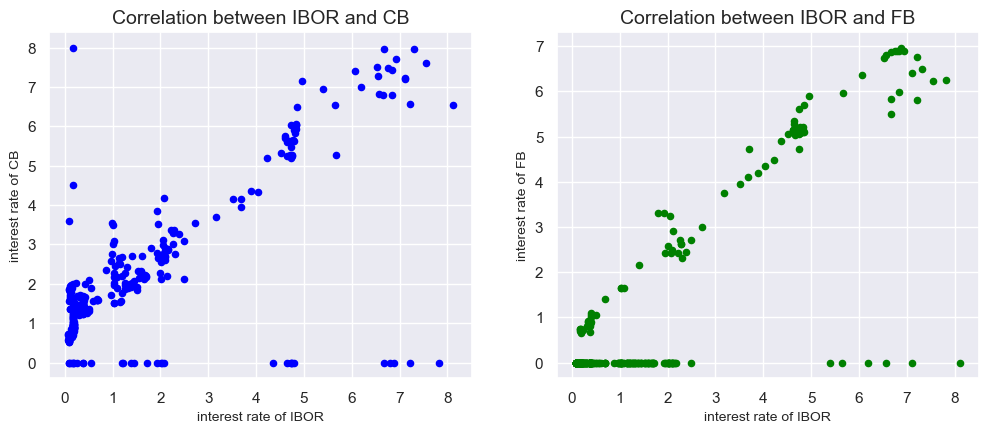

In [150]:
# 圖表設定1 - 金融業拆款和公司債(資本市場)的關係
# 圖表設定2 - 金融業拆款和金融債券(資本市場)的關係

# 建立繪圖物件 fig, 大小為 12 * 4.5, 內有 1 列 2 欄的小圖, 兩圖共用 x 軸, 但不共用y軸
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = False, figsize = (12, 4.5))

# 設定小圖 ax2 的坐標軸標籤, 以及使用 plot 繪圖
ax1.set_title('Correlation between IBOR and CB', fontsize = 14)
ax1.set_xlabel('interest rate of IBOR', fontsize = 10)
ax1.set_ylabel('interest rate of CB', fontsize = 10)
ax1.scatter(IBOR, CB, color = 'blue', s = 20)

# 設定小圖 ax2 的坐標軸標籤, 以及使用 plot 繪圖
ax2.set_title('Correlation between IBOR and FB', fontsize = 14)
ax2.set_xlabel('interest rate of IBOR', fontsize = 10)
ax2.set_ylabel('interest rate of FB', fontsize = 10)
ax2.scatter(IBOR, FB, color = 'green', s = 20)


fig.show()

### Q3：

In [156]:
# 儲存 商業本票(CP)-次級市場 1-30天, 31-90天, 91-180天 的數據
CP30 = df_cou['商業本票-次級市場-1-30天']
CP90 = df_cou['商業本票-次級市場-31-90天']
CP180 = df_cou['商業本票-次級市場-91-180天']


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


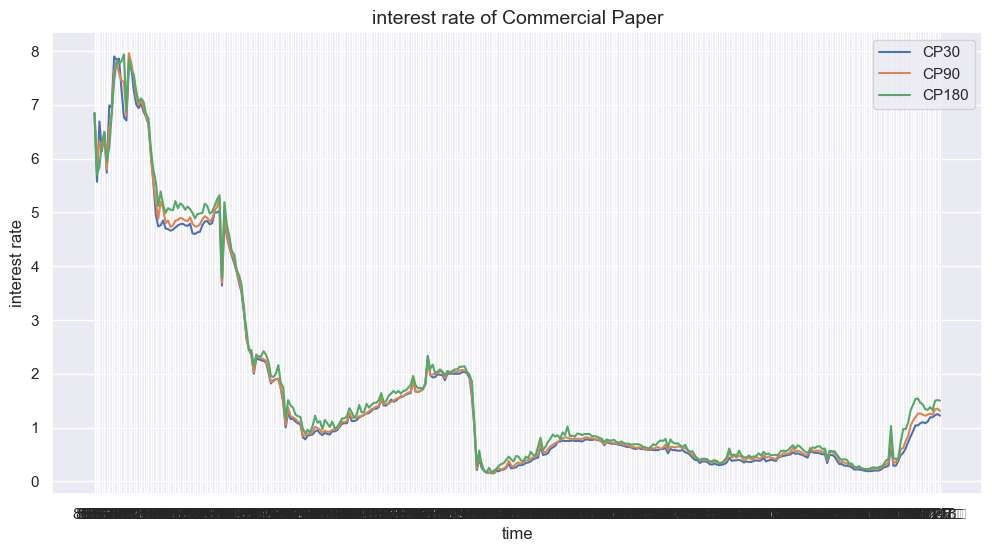

In [165]:
# 圖表設定 - 不同到期日的商業本票(貨幣市場)的利率比較圖

# 建立一個資料框
df_sou = pd.DataFrame(data)

# 設定Seaborn主題
sns.set_theme()

# 使用sns.lineplot來繪製多條線的折線圖，並設定圖片大小
sns.lineplot(data=df_sou, x=DATE, y=CP30, label="CP30")
sns.lineplot(data=df_sou, x=DATE, y=CP90, label="CP90")
sns.lineplot(data=df_sou, x=DATE, y=CP180, label="CP180")
sns.set_context({'figure.figsize':[20, 20]})

# 添加圖示
plt.legend()

# 設定標題和座標軸標題
plt.title("interest rate of Commercial Paper", fontsize = 14)
plt.xlabel("time")
plt.ylabel("interest rate")

# 顯示圖形
plt.show()

In [158]:
# 儲存 商業本票(CB)-次級市場 3年期, 5年期, 10年期 的數據
CB3 = df_cou['公司債-3年期']
CB5 = df_cou['公司債-5年期']
CB10 = df_cou['公司債-10年期']


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.



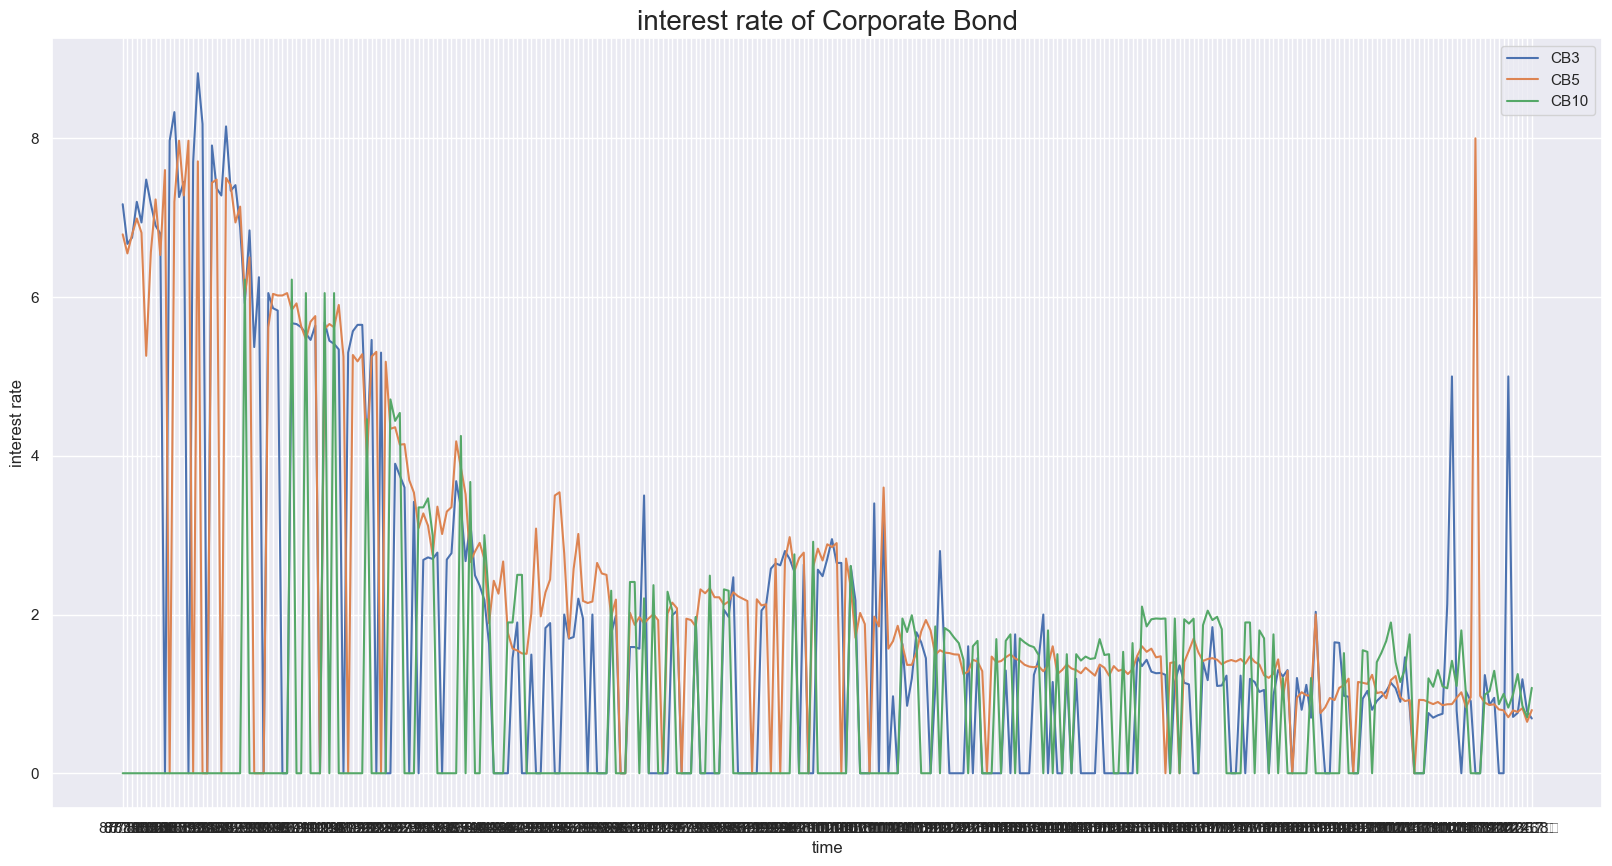

In [221]:
# 圖表設定 - 不同到期日的公司債(資本市場)的利率比較圖

# 建立一個資料框
df_sou = pd.DataFrame(data)

# 設定Seaborn主題
sns.set_theme()

# 使用sns.lineplot來繪製多條線的折線圖，並設定圖片大小
sns.lineplot(data=df_sou, x=DATE, y=CB3, label="CB3")
sns.lineplot(data=df_sou, x=DATE, y=CB5, label="CB5")
sns.lineplot(data=df_sou, x=DATE, y=CB10, label="CB10")
sns.set_context({'figure.figsize':[20, 20]})

# 添加圖示
plt.legend()

# 設定標題和座標軸標題
plt.title("interest rate of Corporate Bond", fontsize = 20)
plt.xlabel("time")
plt.ylabel("interest rate")

# 顯示圖形
plt.show()

### Q4：

In [195]:
# 設定 CSV 檔案(stock_index with IBOR)的路徑
csv_file_path_stin = 'stock_index with IBOR.csv'

# 使用 pandas 的 read_csv 函式讀取 CSV 檔案並將其轉換為 DataFrame 並使用 utf-8 的編碼方式來處理這個檔案
df_stin = pd.read_csv(csv_file_path_stin, encoding = 'utf-8')

df_stin

,日期,臺灣加權指數,美國道瓊工業指數,美國NASDAQ指數,日本日經225,倫敦金融時報,香港恆生指數,韓國綜合指數,新加坡海峽時報,上海綜合指數,金融業拆款
0,87年8月,6550.11,7539.07,-,14107.89,5249.40,7275.04,310.16,885.26,-,6.673
1,87年9月,6833.95,7842.62,-,13406.39,5064.40,7883.46,310.32,939.65,-,6.521
2,87年10月,7165.98,8592.10,-,13564.51,5438.40,10154.94,403.44,1204.62,-,6.061
3,87年11月,7177.22,9116.55,-,14883.70,5743.90,10402.32,451.88,1416.55,-,5.401
4,87年12月,6418.43,9181.43,-,13842.17,5882.60,10048.58,562.46,1392.73,-,4.954
...,...,...,...,...,...,...,...,...,...,...,...
296,112年4月,15579.18,34098.16,12226.58,28856.44,7870.57,19894.57,2501.53,3270.51,3323.27,0.681
297,112年5月,16578.96,32908.27,12935.28,30887.88,7446.14,18234.27,2577.12,3158.80,3204.56,0.683
298,112年6月,16915.54,34407.60,13787.92,33189.04,7531.53,18916.43,2564.28,3205.91,3202.06,0.686
299,112年7月,17145.43,35559.53,14346.02,33172.22,7699.41,20078.94,2632.58,3373.98,3291.04,0.681


In [196]:
# 儲存 臺灣加權指數,金融業拆款 的數據
TAIEX = df_stin['臺灣加權指數']
IBOR = df_stin['金融業拆款']
DATE = df_stin['日期']

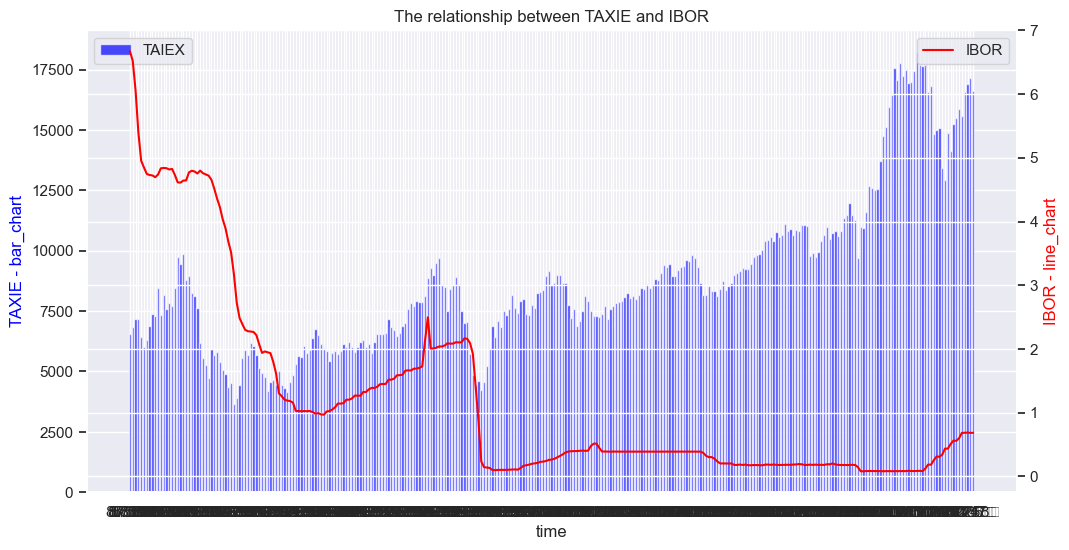

In [198]:
# 臺灣加權指數和金融業拆款是否有關係

# 設定資料
x = DATE
bar_data = TAIEX  # 柱狀圖資料
line_data = IBOR  # 折線圖資料

# 建立一個圖形並設定大小
fig, ax1 = plt.subplots(figsize=(12, 6))

# 繪製柱狀圖
ax1.bar(x, bar_data, alpha=0.7, color='blue', label='TAIEX')

# 創立第二個Y軸，用於繪製折線圖
ax2 = ax1.twinx()

# 繪製折線圖
ax2.plot(x, line_data, color='red', label='IBOR')

# 同時顯示柱狀圖和折線圖的圖示
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 設定圖表標題及軸標籤
plt.title('The relationship between TAXIE and IBOR')
ax1.set_xlabel('time')
ax1.set_ylabel('TAXIE - bar_chart', color='blue')
ax2.set_ylabel('IBOR - line_chart', color='red')

# 顯示圖形
plt.show()


## 回答問題：

1. **貨幣市場金融工具和金融業拆款利率的相關性(央行訂定)**<br>
   央行訂定金融業拆款影響最大的其實是短期的債券，也就是貨幣市場的金融工具，而不論是折線圖和散布圖，我們都可以發現兩者的相關性極高，也就應證
   我們剛剛說的理論。
---
2. **資本市場金融工具和金融業拆款利率的相關性(央行訂定)**<br>
   雖然資本市場的資料有一部分缺失，但我們能然可以發現相較於貨幣市場的金融工具，資本市場的金融工具和金融業拆款相關性沒有那麼緊密、較為發散，
   也符合我們剛剛說的理論。
---
3. **在同一種債券下，到期日較長的利率是否比到期日較長短的利率高**<br>
   短期債券以商業本票為例，長期債券以公司債為例，我們從圖中可以發現到期日較長的利率通常會較高。因為到期日愈長，違約的風險愈高，因此需要較高
   的利率才可被接受。
---
4. **連結上次作業 => 債券利率和股票是否有關係**<br>
   通常因為利率上升，會導致持有債券的成本上升，因此人們會減少持有債券，轉而持有股票。在圖中我們也可以發現，當利率下降時，股票通常是上漲的，    兩者呈反向變動關係。
   